# **Import Library dan Dataset**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

df = pd.read_csv("/content/HeartDisease.csv")

# **Menampilkan 5 data pertama**

In [20]:
print ("5 data pertama :")
df.head()

5 data pertama :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# **Menampilkan 5 data terakhir**

In [21]:
print ("5 data terakhir :")
df.tail()

5 data terakhir :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


# **Data Understanding**

In [22]:
print ("Data shape (baris,kolom) :")
print(df.shape)

print('\n')
df.info()

print ('\nJumlah data duplikat : ' )
df.duplicated().sum()



Data shape (baris,kolom) :
(303, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB

Jumlah data duplikat : 


0

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [24]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# **Data Preparation**

# **Handle Missing Value dan Data Duplikat (tetapi tidak ada data duplikat dilihat dari data understanding diatas)**

In [26]:
df = df.drop_duplicates()
print(f"Jumlah baris sebelum dilakukan dropna: {df.shape[0]}")
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
print(f"Jumlah baris setelah dilakukan dropna: {df.shape[0]}")
print("\nJumlah Dataset Duplikat:")
df.duplicated().sum()

Jumlah baris sebelum dilakukan dropna: 303
Jumlah baris setelah dilakukan dropna: 297

Jumlah Dataset Duplikat:


0

In [27]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Outliers**


ANALISIS OUTLIER: age
Q1: 48.00
Q3: 61.00
IQR: 13.00
Lower Bound: 28.50
Upper Bound: 80.50
Jumlah outliers pada kolom age: 0 (0.00% dari total data)


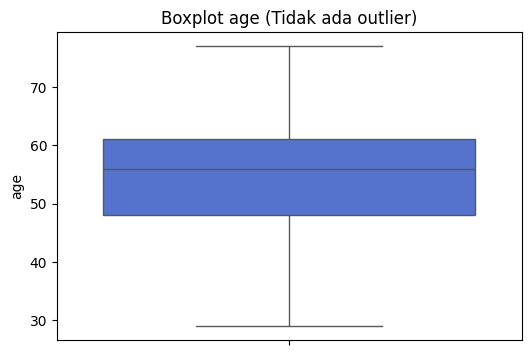


ANALISIS OUTLIER: sex
Q1: 0.00
Q3: 1.00
IQR: 1.00
Lower Bound: -1.50
Upper Bound: 2.50
Jumlah outliers pada kolom sex: 0 (0.00% dari total data)


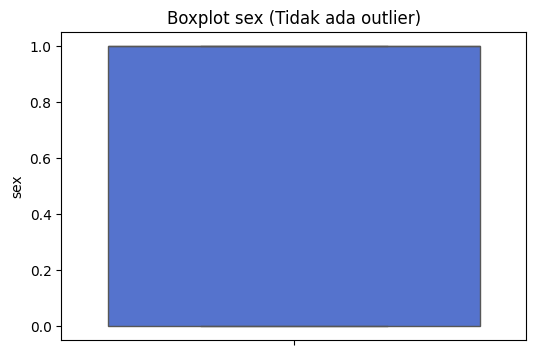


ANALISIS OUTLIER: cp
Q1: 3.00
Q3: 4.00
IQR: 1.00
Lower Bound: 1.50
Upper Bound: 5.50
Jumlah outliers pada kolom cp: 23 (7.74% dari total data)

Outlier ditangani dengan capping (winsorizing)


<ipython-input-28-9fd77620c0b5>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound


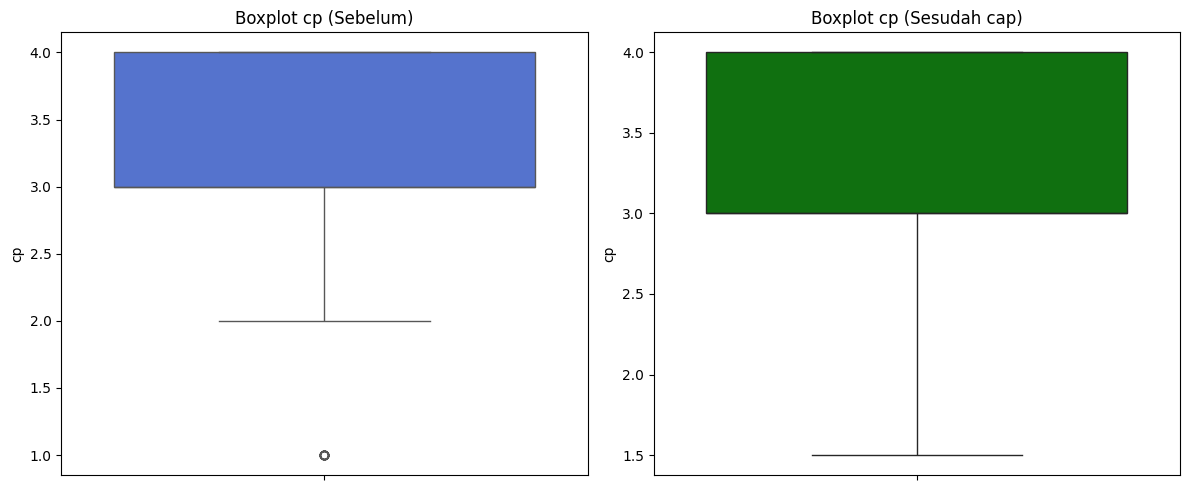


ANALISIS OUTLIER: trestbps
Q1: 120.00
Q3: 140.00
IQR: 20.00
Lower Bound: 90.00
Upper Bound: 170.00
Jumlah outliers pada kolom trestbps: 9 (3.03% dari total data)

Outlier ditangani dengan capping (winsorizing)


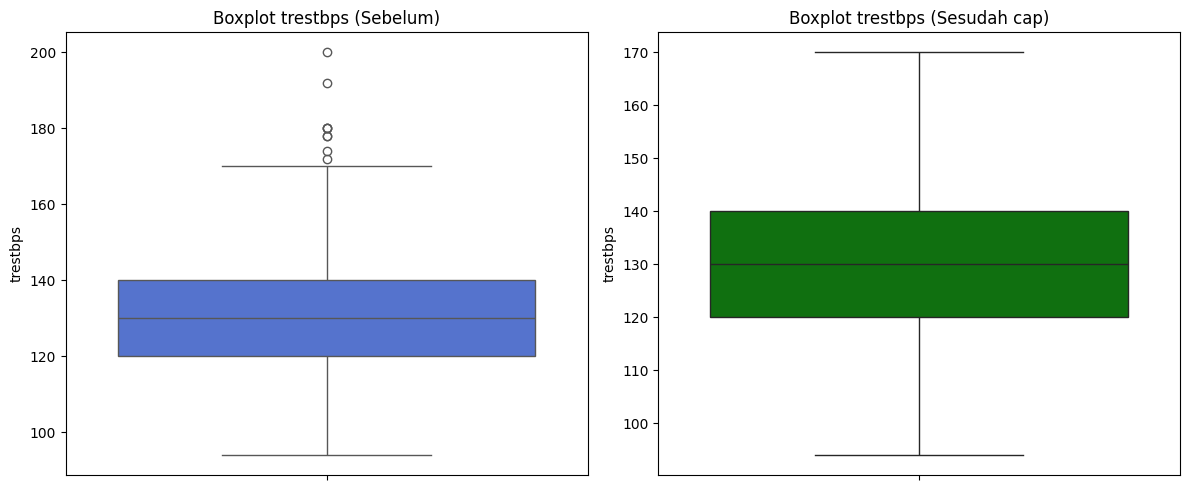


ANALISIS OUTLIER: chol
Q1: 211.00
Q3: 276.00
IQR: 65.00
Lower Bound: 113.50
Upper Bound: 373.50
Jumlah outliers pada kolom chol: 5 (1.68% dari total data)

Outlier ditangani dengan capping (winsorizing)


<ipython-input-28-9fd77620c0b5>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound


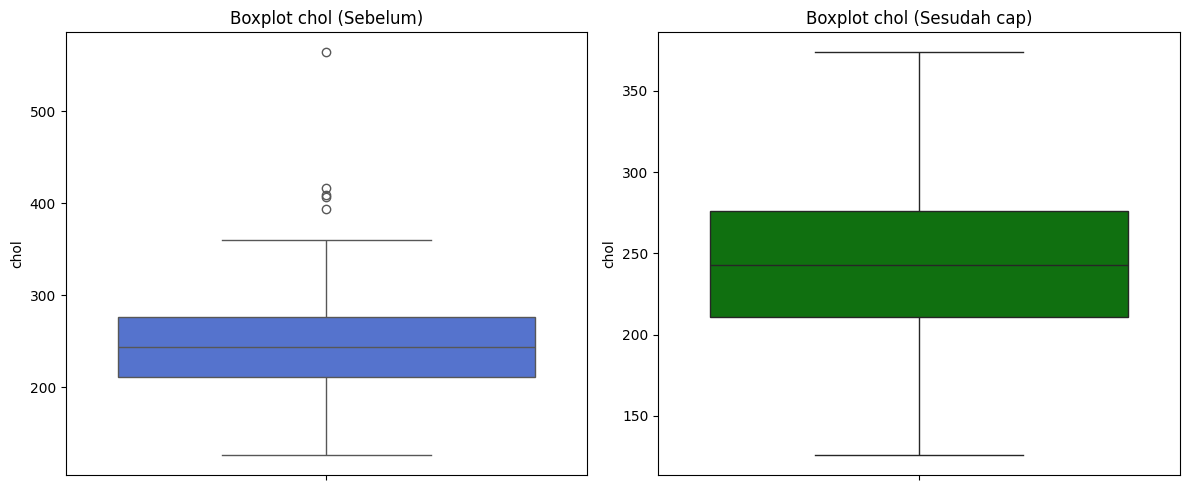


ANALISIS OUTLIER: fbs
Q1: 0.00
Q3: 0.00
IQR: 0.00
Lower Bound: 0.00
Upper Bound: 0.00
Jumlah outliers pada kolom fbs: 43 (14.48% dari total data)

Outlier ditangani dengan capping (winsorizing)


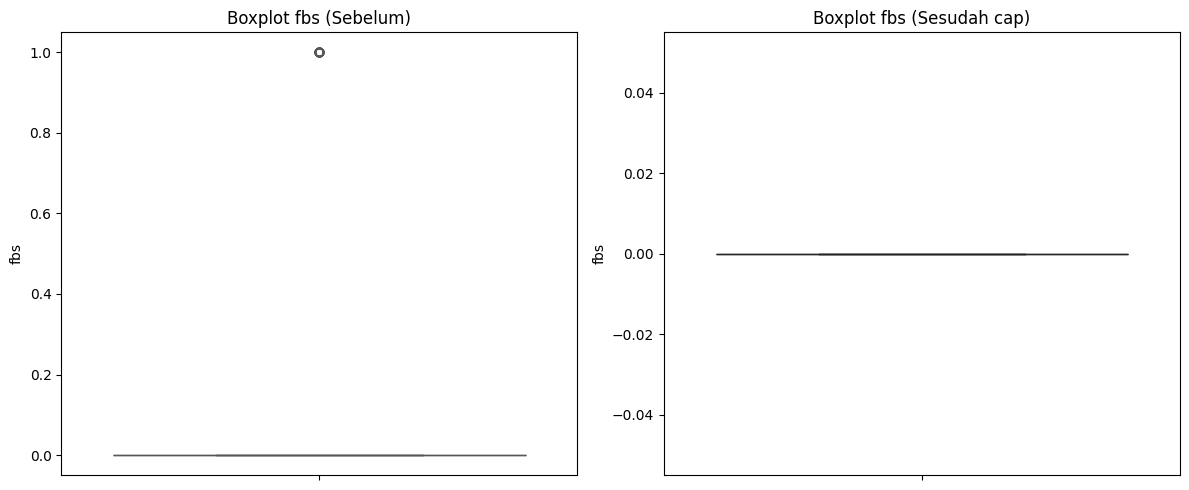


ANALISIS OUTLIER: restecg
Q1: 0.00
Q3: 2.00
IQR: 2.00
Lower Bound: -3.00
Upper Bound: 5.00
Jumlah outliers pada kolom restecg: 0 (0.00% dari total data)


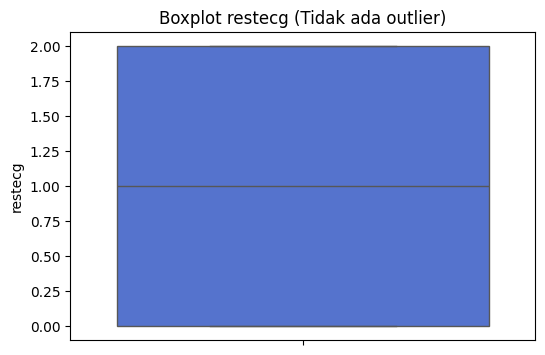


ANALISIS OUTLIER: thalach
Q1: 133.00
Q3: 166.00
IQR: 33.00
Lower Bound: 83.50
Upper Bound: 215.50
Jumlah outliers pada kolom thalach: 1 (0.34% dari total data)

Outlier ditangani dengan capping (winsorizing)


<ipython-input-28-9fd77620c0b5>:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '83.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound


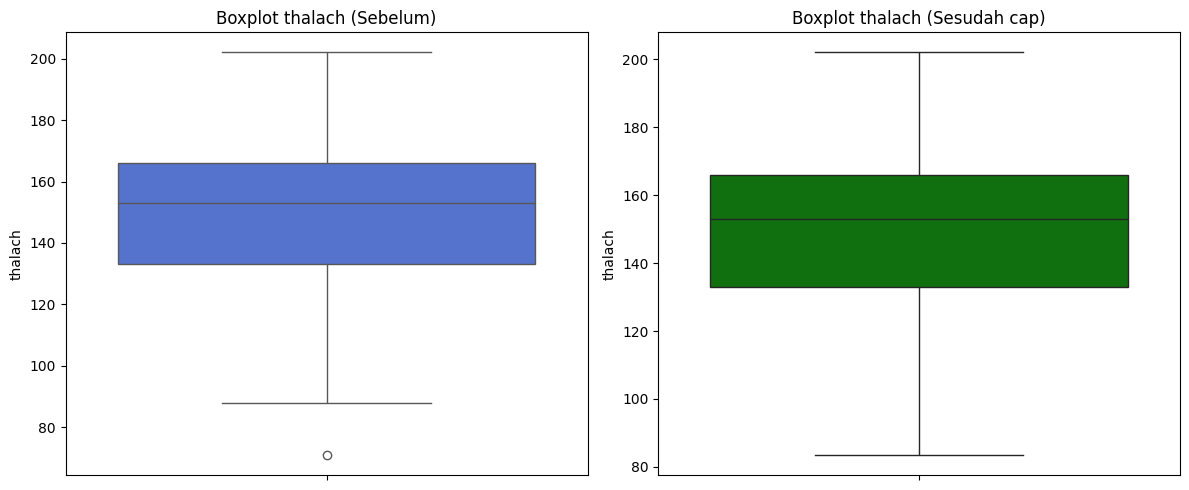


ANALISIS OUTLIER: exang
Q1: 0.00
Q3: 1.00
IQR: 1.00
Lower Bound: -1.50
Upper Bound: 2.50
Jumlah outliers pada kolom exang: 0 (0.00% dari total data)


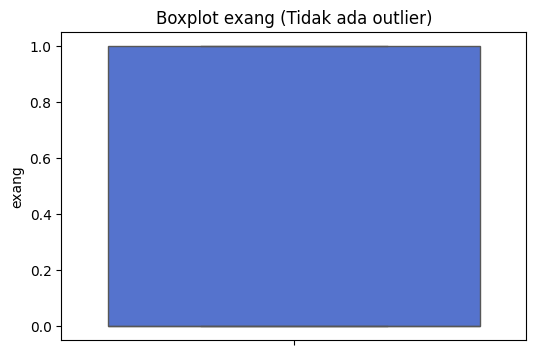


ANALISIS OUTLIER: oldpeak
Q1: 0.00
Q3: 1.60
IQR: 1.60
Lower Bound: -2.40
Upper Bound: 4.00
Jumlah outliers pada kolom oldpeak: 5 (1.68% dari total data)

Outlier ditangani dengan capping (winsorizing)


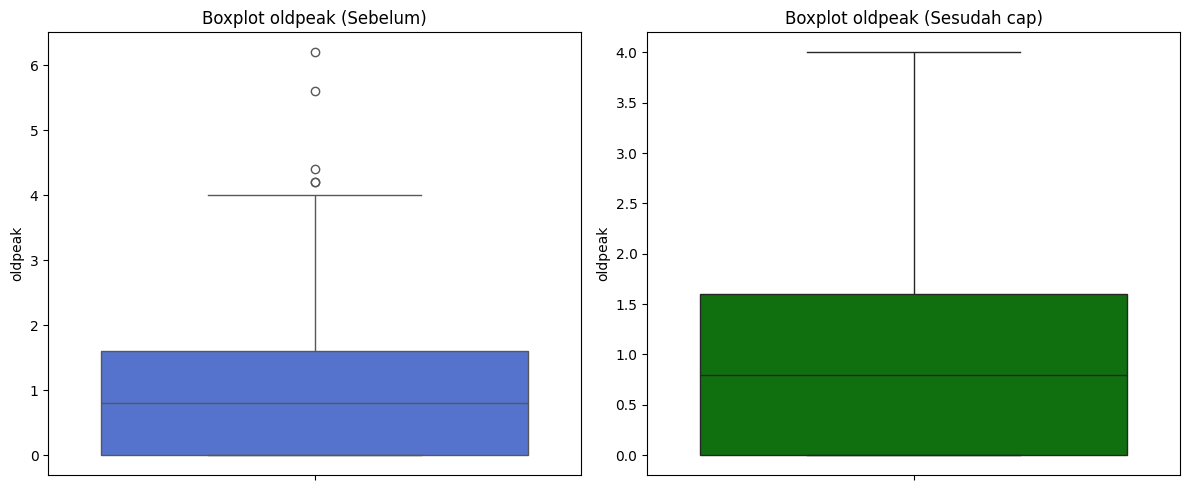


ANALISIS OUTLIER: slope
Q1: 1.00
Q3: 2.00
IQR: 1.00
Lower Bound: -0.50
Upper Bound: 3.50
Jumlah outliers pada kolom slope: 0 (0.00% dari total data)


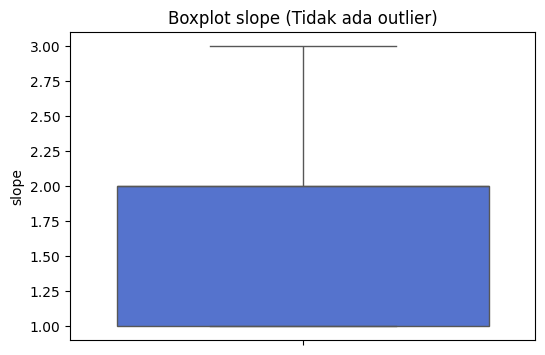


ANALISIS OUTLIER: ca
Q1: 0.00
Q3: 1.00
IQR: 1.00
Lower Bound: -1.50
Upper Bound: 2.50
Jumlah outliers pada kolom ca: 20 (6.73% dari total data)

Outlier ditangani dengan capping (winsorizing)


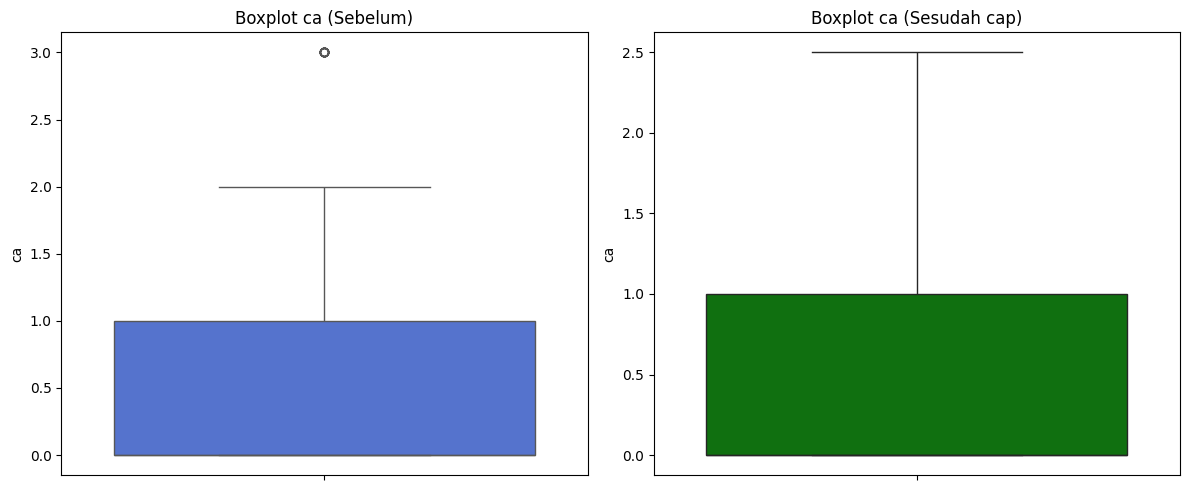


ANALISIS OUTLIER: thal
Q1: 3.00
Q3: 7.00
IQR: 4.00
Lower Bound: -3.00
Upper Bound: 13.00
Jumlah outliers pada kolom thal: 0 (0.00% dari total data)


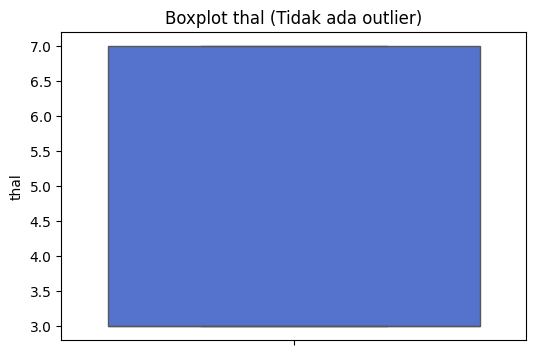


ANALISIS OUTLIER: num
Q1: 0.00
Q3: 2.00
IQR: 2.00
Lower Bound: -3.00
Upper Bound: 5.00
Jumlah outliers pada kolom num: 0 (0.00% dari total data)


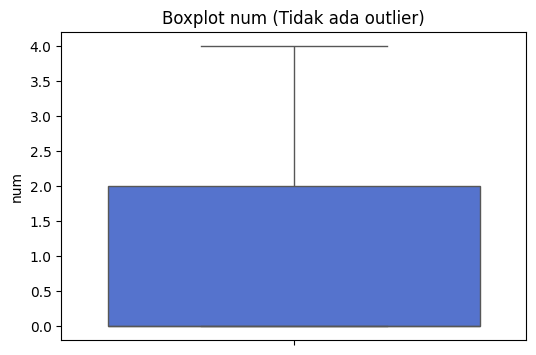

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_handle_outliers(df, handle_method='cap', multiplier=1.5):
    """
    Fungsi untuk mendeteksi outlier dan menampilkan boxplot sebelum dan sesudah penanganan

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame yang akan dianalisis
    handle_method : str, default='cap'
        Metode penanganan outlier ('cap', 'remove', 'mean', atau 'median')
    multiplier : float, default=1.5
        Faktor pengali IQR untuk menentukan batas outlier

    Returns:
    --------
    df_cleaned : pandas DataFrame
        DataFrame setelah penanganan outlier
    """
    # Buat salinan dataframe untuk dimodifikasi
    df_cleaned = df.copy()

    # Dapatkan kolom numerik
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Loop untuk setiap kolom numerik
    for col in numerical_columns:
        # Hitung statistik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Identifikasi outlier
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        num_outliers = outlier_mask.sum()
        outlier_percentage = (num_outliers / df.shape[0]) * 100

        # Tampilkan informasi statistik dan jumlah outlier
        print(f"\n{'='*50}")
        print(f"ANALISIS OUTLIER: {col}")
        print(f"{'='*50}")
        print(f"Q1: {Q1:.2f}")
        print(f"Q3: {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"Lower Bound: {lower_bound:.2f}")
        print(f"Upper Bound: {upper_bound:.2f}")
        print(f"Jumlah outliers pada kolom {col}: {num_outliers} ({outlier_percentage:.2f}% dari total data)")

        # Terapkan penanganan outlier jika ada
        if num_outliers > 0:
            # Buat boxplot sebelum dan sesudah penanganan
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Boxplot data asli
            sns.boxplot(y=df[col], ax=ax1, color="royalblue")
            ax1.set_title(f"Boxplot {col} (Sebelum)")
            ax1.set_ylabel(col)

            # Penanganan outlier berdasarkan metode yang dipilih
            if handle_method == 'cap':
                df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound
                df_cleaned.loc[df_cleaned[col] > upper_bound, col] = upper_bound
                print(f"\nOutlier ditangani dengan capping (winsorizing)")
            elif handle_method == 'remove':
                df_cleaned = df_cleaned[~outlier_mask]
                print(f"\nOutlier ditangani dengan menghapus {num_outliers} baris data")
            elif handle_method == 'mean':
                mean_val = df[col].mean()
                df_cleaned.loc[outlier_mask, col] = mean_val
                print(f"\nOutlier ditangani dengan mengganti nilai outlier dengan mean: {mean_val:.2f}")
            elif handle_method == 'median':
                median_val = df[col].median()
                df_cleaned.loc[outlier_mask, col] = median_val
                print(f"\nOutlier ditangani dengan mengganti nilai outlier dengan median: {median_val:.2f}")

            # Boxplot data yang sudah ditangani
            sns.boxplot(y=df_cleaned[col], ax=ax2, color="green")
            ax2.set_title(f"Boxplot {col} (Sesudah {handle_method})")
            ax2.set_ylabel(col)

            plt.tight_layout()
            plt.show()
        else:
            # Jika tidak ada outlier, tampilkan hanya satu boxplot
            plt.figure(figsize=(6, 4))
            sns.boxplot(y=df[col], color="royalblue")
            plt.title(f"Boxplot {col} (Tidak ada outlier)")
            plt.ylabel(col)
            plt.show()

    return df_cleaned

# Contoh penggunaan:
df_clean = detect_and_handle_outliers(df, handle_method='cap')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


# **Target, Features and Split Data**

In [31]:
X = df.drop(columns=["num"])  # Semua fitur kecuali target
y = df["num"]  # Target klasifikasi

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
# Standardization (Feature Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Train Model**

In [33]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **Prediction**

In [34]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# **Evaluation Metrics**

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')



print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.59
Precision: 0.56
Recall: 0.59
F1 Score: 0.57
ROC AUC: 0.81


# **Visualization**

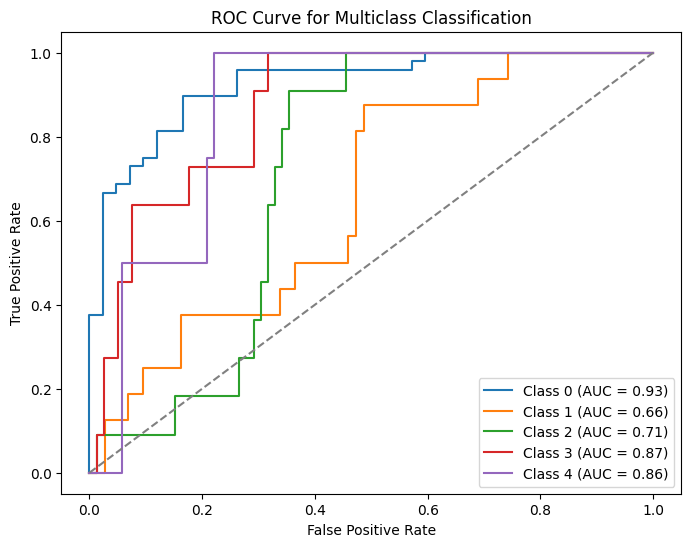

In [43]:
from sklearn.preprocessing import label_binarize

# Binarize target labels untuk multiclass ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Jika multiclass, ROC Curve harus dihitung untuk setiap kelas
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()


In [44]:
# Explanation of Mathematical Formulas
logit_function = "log(p/(1-p)) = b0 + b1*x1 + b2*x2 + ... + bn*xn"
print("Logistic Regression Equation:")
print(logit_function)

sigmoid_function = "p = 1 / (1 + e^(-z)), where z = b0 + b1*x1 + ... + bn*xn"
print("Sigmoid Function:")
print(sigmoid_function)

Logistic Regression Equation:
log(p/(1-p)) = b0 + b1*x1 + b2*x2 + ... + bn*xn
Sigmoid Function:
p = 1 / (1 + e^(-z)), where z = b0 + b1*x1 + ... + bn*xn


# **Accuracy**

Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


Di mana:

TP (True Positive): Prediksi positif yang benar.

TN (True Negative): Prediksi negatif yang benar.

FP (False Positive): Prediksi positif yang salah.

FN (False Negative): Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.

---
# **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:
$$
Precision = \frac{TP}{TP + FP}
$$


Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.

---
# **Recall**
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:
$$
Recall = \frac{TP}{TP + FN}
$$


Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.

---
# **F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$


F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.

---
# **AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

True Positive Rate (TPR) atau Recall:
$$
TPR = \frac{TP}{TP + FN}
$$



False Positive Rate (FPR):
$$
FPR = \frac{FP}{FP + TN}
$$



AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.



